In [1]:
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt
import warnings
%matplotlib inline


# HW 2:  Root Finding and Optimization

## Question 1 - Fun with Fixed Point iteration

Let's say that we wanted to calculate $\sqrt{M}$ given that $M \in \mathbb{R}$ and $M > 0$ and that we did not want to use the function `sqrt` directly.  Consider the function 

$$
    f(x) = x^2 - M
$$

which has a positive root at at $x=\sqrt{M}$.   Here we will try to solve this using  fixed point iteration

$$
    x_{k+1} = g(x_k)
$$
for several different iteration functions $g(x)$ (see below)

For each function $g$:

- Confirm analytically that $x=\sqrt{M}$ is a fixed point of $g(x)$
- Analyze the convergence behavior close to the fixed-point and determine the stability of the iterative scheme
- Now set $M=3$  and $x_0 = 2$.  Make a nicely labeled convergence plot showing the log of the relative error as a function of iteration. How many iterations are required to reduce the relative error to machine precision (if it converges)?

**Remember**: if you want to write $g^\prime$, remember to use `g^\prime` rather than `g'` in $\LaTeX$

**(a)** [4] To help with the last part,  write a short python function to return N iterations of a fixed point iteration.

In [2]:
def fixed_point(g, x0, N=5):
    """conduct N iterations of the fixed point iteration x_{k+1} = g(x_k)
    
    :Input:
        - *g* (function) - The iteration function
        - *x_0* (float) - Initial iterate
        - *N* (int) - number of terms in iteration
     
    :Output:
        x: numpy array (float)
            array containing the iterations [ x0, x1, ... x_N ]
    """
    xlist = [x0]
    for i in range(N):
        xlist.append(g(xlist[-1]))
    
    return numpy.array(xlist)

In [3]:
### Free cell for messing with your code

In [4]:
# Testing Cell

N = 5
g = lambda x: numpy.cos(x)
x0 = 1.
answer = numpy.array([1., 0.54030231, 0.85755322, 0.65428979, 0.79348036, 0.70136877])

x = fixed_point(g, x0, N )
numpy.testing.assert_allclose(x, answer)
print('success: passed N=5 test')

x_true = 0.7390851332153119
x = fixed_point(g, x0, 1000)
numpy.testing.assert_almost_equal(x[-1],x_true)
print('success: passed N=1000 test')

success: passed N=5 test
success: passed N=1000 test


**(b)** [6] analyze the problem with 
$$ g(x) = 1 + x - \frac{x^2}{M}$$

Let $x = \sqrt{M}$, 
\begin{align*}
g(\sqrt{M}) &= 1 + \sqrt{M} - \frac{{\sqrt{M}}^2}{M} \\ 
&= 1 + \sqrt{M} - 1 \\ 
&= \sqrt{M}
\end{align*}
Thus, $x = \sqrt{M}$ is a fixed point. 

Taking the first derivative gives 
\begin{align*}
g^{\prime}(x) &= 1 - \frac{2x}{M} \\ 
g^{\prime}(\sqrt{M}) &= 1 - \frac{2 \sqrt{M}}{M} \\
&= 1 - \frac{2}{\sqrt{M}}
\end{align*}

If $|1 - \frac{2}{\sqrt{M}}| < 1$, which is when $M > 1$, the iteration will converge. If $|1 - \frac{2}{\sqrt{M}}| > 1$, which is when $M < 1$, the iteration will diverge.

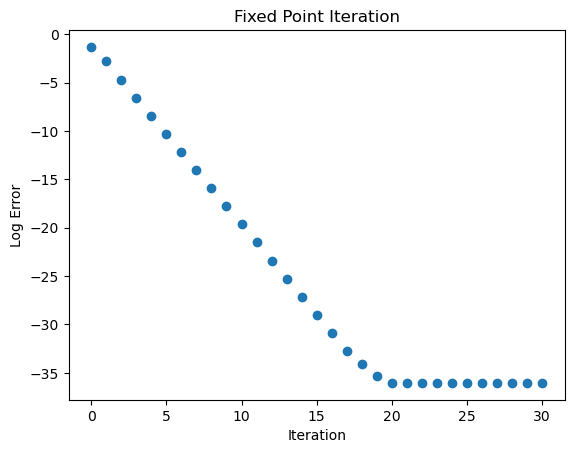

Relative error becomes less than machine epsilon at iteration 19


In [5]:
# Place plotting code here if needed

g = lambda x: 1 + x - x**2 / M 
M = 3
x0 = 2

x = fixed_point(g, x0, 30)
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
# print(x)
# print(x - numpy.sqrt(M))
# print(numpy.log(numpy.abs(x - numpy.sqrt(M))))
axes.plot(numpy.log(numpy.abs(x - numpy.sqrt(M)) + numpy.finfo(float).eps), 'o')
axes.set_title('Fixed Point Iteration')
axes.set_xlabel('Iteration')
axes.set_ylabel('Log Error')
plt.show()

# Find when does absolute error less than machine epsilon
x = fixed_point(g, x0, 1000)
for i in range(len(x)):
    if numpy.abs(x[i] - numpy.sqrt(M)) / numpy.abs(numpy.sqrt(M)) < numpy.finfo(float).eps:
        print('Relative error becomes less than machine epsilon at iteration', i)
        break
if i == len(x) - 1:
    print('Iteration does not converge')

 **(c)** [6] analyze the problem with 
$$ g(x) = \frac{M}{x}$$

Let $x = \sqrt{M}$, 
\begin{align*}
g(\sqrt{M}) &= \frac{M}{\sqrt{M}} \\ 
&= \sqrt{M}
\end{align*}
Thus, $x = \sqrt{M}$ is a fixed point. 

Taking the first derivative gives 
\begin{align*}
g^{\prime}(x) &= -M x^{-2} \\ 
g^{\prime}(\sqrt{M}) &= -M {\sqrt{M}}^{-2} \\ 
&= -1
\end{align*}
Thus, $|g^{\prime}(\sqrt{M})| = 1$ and we can not see the convergence of iteration from this. 

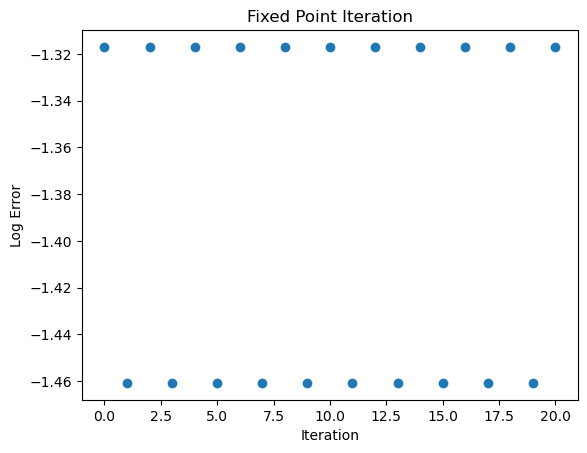

Iteration does not converge


In [6]:
# Place plotting code here if needed

g = lambda x: M / x
M = 3
x0 = 2

x = fixed_point(g, x0, 20)
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
# print(x)
# print(x - numpy.sqrt(M))
# print(numpy.log(numpy.abs(x - numpy.sqrt(M))))
axes.plot(numpy.log(numpy.abs(x - numpy.sqrt(M))), 'o')
axes.set_title('Fixed Point Iteration')
axes.set_xlabel('Iteration')
axes.set_ylabel('Log Error')
plt.show()

# Find when does absolute error less than machine epsilon
x = fixed_point(g, x0, 1000)
for i in range(len(x)):
    if numpy.abs(x[i] - numpy.sqrt(M)) / numpy.abs(numpy.sqrt(M)) < numpy.finfo(float).eps:
        print('Relative error becomes less than machine epsilon at iteration', i)
        break
if i == len(x) - 1:
    print('Iteration does not converge')

**(d)** [6] Newton's method
$$ g(x) = x - \frac{f}{f^\prime}$$

with $$ f = x^2 - M$$

We can simplify $g(x)$ by 
\begin{align*}
g(x) &= x - \frac{x^2 - M}{2x} \\ 
&= x - \frac{x}{2} + \frac{M}{2x} \\ 
&= \frac{x}{2} + \frac{M}{2x}
\end{align*}

Let $x = \sqrt{M}$, 
\begin{align*}
g(\sqrt{M}) &= \frac{x}{2} + \frac{M}{2 \sqrt{M}} \\ 
&= \sqrt{M}
\end{align*}
Thus, $x = \sqrt{M}$ is a fixed point. 

Taking the first derivative gives 
\begin{align*}
g^{\prime}(x) &= \frac{1}{2} - \frac{M}{2} x^{-2} \\ 
g^{\prime}(\sqrt{M}) &= \frac{1}{2} - \frac{M}{2} {\sqrt{M}}^{-2} \\ 
&= 0
\end{align*}
Thus, $|g^{\prime}(\sqrt{M})| < 1$ and will always converge. 

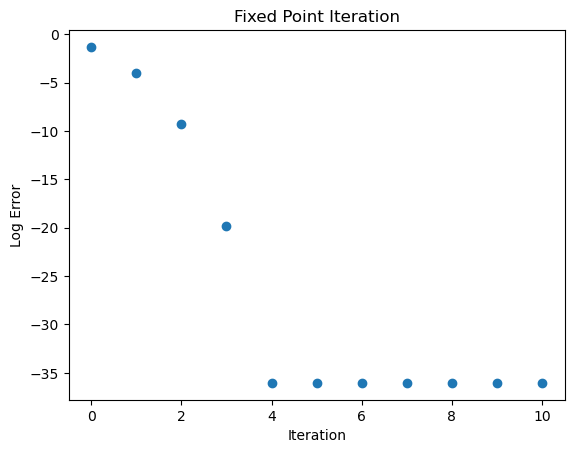

Relative error becomes less than machine epsilon at iteration 4


In [7]:
# Place plotting code here if needed

g = lambda x: x / 2 + M / (2 * x)
M = 3
x0 = 2

x = fixed_point(g, x0, 10)
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
# print(x)
# print(x - numpy.sqrt(M))
# print(numpy.log(numpy.abs(x - numpy.sqrt(M))))
axes.plot(numpy.log(numpy.abs(x - numpy.sqrt(M)) + numpy.finfo(float).eps), 'o')
axes.set_title('Fixed Point Iteration')
axes.set_xlabel('Iteration')
axes.set_ylabel('Log Error')
plt.show()

# Find when does absolute error less than machine epsilon
x = fixed_point(g, x0, 1000)
for i in range(len(x)):
    if numpy.abs(x[i] - numpy.sqrt(M)) / numpy.abs(numpy.sqrt(M)) < numpy.finfo(float).eps:
        print('Relative error becomes less than machine epsilon at iteration', i)
        break
if i == len(x) - 1:
    print('Iteration does not converge')

## Question 2 - Fun with Rootfinders and NewtSafe

This problem will explore the behavior of a range of different rootfinding routines against  a more challenging rootfinding problem.  Feel free to use any or all  of the routines presented in class which have been included in an auxiliary python file `rootfinding_optimization_schemes.py`


You need to have this file in the same directory with your homework for this notebook to import it.

In [8]:
#  Cell to import and test at least newton's method from class

from  rootfinding_optimization_schemes import newton

# set test function and its derivative
f = lambda x: numpy.cos(x) - x
f_prime = lambda x: -numpy.sin(x) - 1.

#set initial guess and call newton
x0 = 1.
x, x_array = newton(f, f_prime, x0,tol=1.e-12)

# run tests
answer = 0.7390851332151606
N = 5
numpy.testing.assert_almost_equal(x, answer)
numpy.testing.assert_almost_equal(N, len(x_array))
print("functions loaded correctly")

functions loaded correctly


Consider the function 

$$
    f(x) = \cos(x) +  N(x, A, \alpha, \beta))
$$
where

$$
    N(x, A, \alpha, \beta) =  A\left[\sin(\alpha x) + \sin(\beta x)\right]
$$

is a function that adds smooth additive "noise" with fixed amplitude $A = 0.05$ and varying frequencies $\alpha$ and $\beta$

**(a)** [4] Make a nicely labeled plot to showing the behavior of this function for 
* $\alpha = 0.$, $\beta =0.$
* $\alpha = 4.$, $\beta =5.$
* $\alpha = 27$, $\beta = 50$

over the domain $x\in[-2\pi, 2\pi]$. Make sure you have enough points to resolve the wiggles.  You can plot all three curves on the same plot

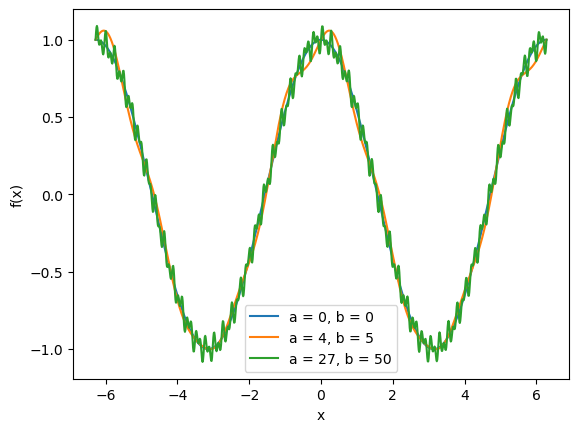

In [9]:
f = lambda x: numpy.cos(x) + N(x, A, a, b)
N = lambda x, A, a, b: A * (numpy.sin(a * x) + numpy.sin(b * x))
A = 0.05

x = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, 1000)


fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
a = 0
b = 0
axes.plot(x, f(x), label='a = 0, b = 0')
a = 4
b = 5
axes.plot(x, f(x), label='a = 4, b = 5')
a = 27
b = 50
axes.plot(x, f(x), label='a = 27, b = 50')
axes.set_xlabel('x')
axes.set_ylabel('f(x)')
axes.legend()
plt.show()

**(b)** [4] Explore the behavior of the following rootfinding routines 
* bisection
* newton
* secant
* brentq method using scipy.optimize.root_scalar
* **EXTRA CREDIT** any other method used in root_scalar

for finding a root of this function, given the bracket $x\in[x_0, x_1]$ with $x_0 = 0.2$, $x_1 = 2.$ for each ($\alpha, \beta$) pair

`params = [ (0., 0.), (4., 5.),  (27, 50.) ]`

For each routine,  report
* the root found $x^*$
* the value of $f$ at the root $f(x^*$)
* the number of iterations.

In [10]:
params = [ (0., 0.), (4., 5.),  (27, 50.) ]

# Bisection
from rootfinding_optimization_schemes import bisection, newton, secant
from scipy import optimize

x0 = 0.2 
x1 = 2

print('Bisection Method')
for i in range(len(params)): 
    a, b = params[i]
    result = bisection(f, x0, x1)
    print('For a =', a, 'b =', b)
    print('the root is', result[0])
    print('the value of f at the root is', f(result[0]))
    print('the number of iterations is', len(result[1]))
    print('---------------------------------')

Bisection Method
For a = 0.0 b = 0.0
the root is 1.570796775817871
the value of f at the root is -4.490229742968679e-07
the number of iterations is 20
---------------------------------
For a = 4.0 b = 5.0
the root is 1.6304405212402344
the value of f at the root is 1.9620940002601506e-07
the number of iterations is 18
---------------------------------
For a = 27 b = 50.0
the root is 1.5567201137542725
the value of f at the root is -3.49143903736332e-08
the number of iterations is 22
---------------------------------


In [11]:
print('Newton Method')
f_prime = lambda x: -numpy.sin(x) + N_prime(x, A, a, b)
N_prime = lambda x, A, a, b: A * (a * numpy.cos(a * x) + b * numpy.cos(b * x))
for i in range(len(params)): 
    a, b = params[i]
    result = newton(f, f_prime , x0)
    print('For a =', a, 'b =', b)
    print('the root is', result[0])
    print('the value of f at the root is', f(result[0]))
    print('the number of iterations is', len(result[1]))
    print('---------------------------------')

Newton Method
For a = 0.0 b = 0.0
the root is 4.71238898038469
the value of f at the root is -1.8369701987210297e-16
the number of iterations is 5
---------------------------------
For a = 4.0 b = 5.0
the root is -14.096326236971352
the value of f at the root is 6.931560738582254e-08
the number of iterations is 5
---------------------------------
For a = 27 b = 50.0
the root is 1.5567201153371448
the value of f at the root is -4.0306714679458344e-08
the number of iterations is 73
---------------------------------


In [12]:
print('Secant Method')
for i in range(len(params)): 
    a, b = params[i]
    result = secant(f, x0, x1)
    print('For a =', a, 'b =', b)
    print('the root is', result[0])
    print('the value of f at the root is', f(result[0]))
    print('the number of iterations is', len(result[1]))
    print('---------------------------------')

Secant Method
For a = 0.0 b = 0.0
the root is 1.5707963267998242
the value of f at the root is -4.927552640156338e-12
the number of iterations is 6
---------------------------------
For a = 4.0 b = 5.0
the root is 1.6304406749277849
the value of f at the root is 6.13728728740548e-08
the number of iterations is 7
---------------------------------
For a = 27 b = 50.0
the root is 1.5567201023472799
the value of f at the root is 3.9454700583030355e-09
the number of iterations is 9
---------------------------------


In [13]:
print('Brentq Method')
for i in range(len(params)): 
    a, b = params[i]
    sol = optimize.root_scalar(f, bracket=[x0, x1], method='brentq')
    print('For a =', a, 'b =', b)
    print('the root is', sol.root)
    print('the value of f at the root is', f(sol.root))
    print('the number of iterations is', sol.iterations)
    print('---------------------------------')

Brentq Method
For a = 0.0 b = 0.0
the root is 1.5707963267948966
the value of f at the root is 6.123233995736766e-17
the number of iterations is 7
---------------------------------
For a = 4.0 b = 5.0
the root is 1.630440744880973
the value of f at the root is -2.983724378680108e-16
the number of iterations is 8
---------------------------------
For a = 27 b = 50.0
the root is 1.5567201035054403
the value of f at the root is -3.139849491518021e-16
the number of iterations is 10
---------------------------------


In [14]:
print('Halley Method')
f_prime = lambda x: -numpy.sin(x) + N_prime(x, A, a, b)
N_prime = lambda x, A, a, b: A * (a * numpy.cos(a * x) + b * numpy.cos(b * x))
f_prime_2 = lambda x: -numpy.cos(x) + N_prime_2(x, A, a, b)
N_prime_2 = lambda x, A, a, b: -A * (a**2 * numpy.sin(a * x) + b**2 * numpy.sin(b * x))
for i in range(len(params)): 
    a, b = params[i]
    sol = optimize.root_scalar(f, x0=x0, fprime=f_prime, fprime2=f_prime_2, method='halley')
    print('For a =', a, 'b =', b)
    print('the root is', sol.root)
    print('the value of f at the root is', f(sol.root))
    print('the number of iterations is', sol.iterations)
    print('---------------------------------')

Halley Method
For a = 0.0 b = 0.0
the root is 4.71238898038469
the value of f at the root is -1.8369701987210297e-16
the number of iterations is 5
---------------------------------
For a = 4.0 b = 5.0
the root is -14.096326292548325
the value of f at the root is 1.0408340855860843e-15
the number of iterations is 5
---------------------------------
For a = 27 b = 50.0
the root is 1.5567201035054403
the value of f at the root is -3.139849491518021e-16
the number of iterations is 26
---------------------------------


**(c)** [4] Make a convergence plot showing the relative error at each step for Newton's method for the same three parameter pairs and initial guess $x_0 = 0.2$.

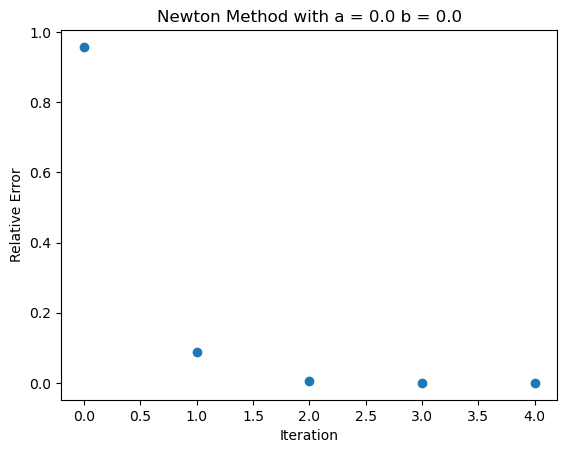

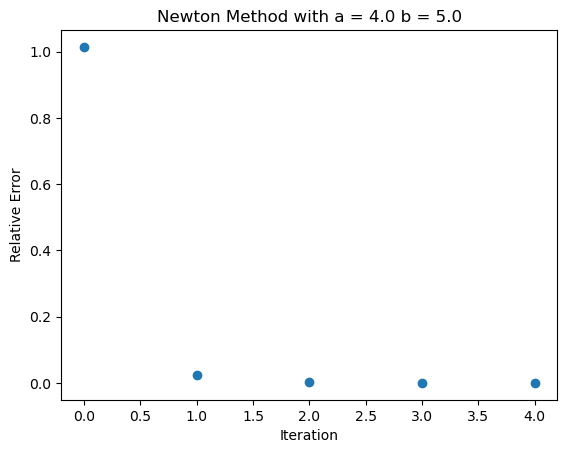

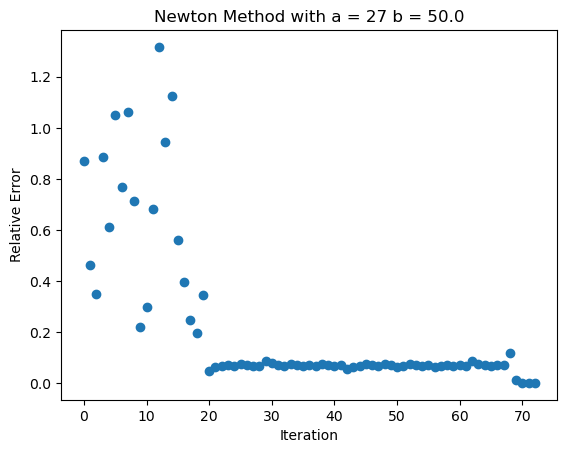

In [15]:
f_prime = lambda x: -numpy.sin(x) + N_prime(x, A, a, b)
N_prime = lambda x, A, a, b: A * (a * numpy.cos(a * x) + b * numpy.cos(b * x))

for i in range(len(params)): 
    a, b = params[i]
    result = newton(f, f_prime , x0)
    rel_error = numpy.abs(result[1] - result[0]) / numpy.abs(result[0])
    fig = plt.figure()
    axes = fig.add_subplot(1, 1, 1)
    axes.plot(rel_error, 'o')
    axes.set_title('Newton Method with a = ' + str(a) + ' b = ' + str(b))
    axes.set_xlabel('Iteration')
    axes.set_ylabel('Relative Error')
    plt.show()

**(d)** [4] Briefly explain your results so far for all the methods.  Feel free to play with other initial parameters or to make additional plots.  

Secant method and brentq method are robust and requires fewer iterations. Newton's method works well when there is low noise, but its performance becomes very poor when $a = 27$ and $b = 50$, which is likely due to the effect of noise in first derivative. Bisection is not affected by the noise, but it usually takes more iterations to achieve the result.  

**(e)** [6] Write a controlled Newton routine `NewtSafe`,  that finds a root with an initial bracket by combining newton steps with a bisection routine.  The basic algorithm is to first try Newton from the midpoint of the bracket.  If Newton predicts a solution outside of the bracket, ignore it and take a bisection step instead.  You can use and modify any of the rootfinding routines I presented in class, but write a decent docstring and raise appropriate exceptions as necessary. 

The routine should return the best estimate of the root and number of Newton Steps and the number of bisection steps

`x, N_newt, N_bisection = newtsafe(f, f_prime, a, b)`

In [16]:
def newtsafe(f,f_prime,a,b,tol = 1.e-6, max_steps=1000):
    """ 
    Perform a hybrid root-finding algorithm combining Newton's method and bisection to find a root of the function f(x) within a given bracket.
        
    Parameters:
    -----------
    
    f: function (float)
        function returning f(x)
    f_prime:  function (float)
        function returning derivative of f with respect to x
    a: float
        left bracket a < x
    b: float
        right bracket x < b
        
        Note:  the signs of f(a) and f(b) must be different to insure a bracket
    tol: float
        tolerance.  Returns when |f(x)| < tol
    max_steps: int
        maximum number of iteration steps
        
    Returns:
    --------
    x: float
        midpoint of final bracket
    n_newt:  number of newton steps for successful newton iteration
    n_bisection: number of bisection steps
        
    Raises:
    -------
    ValueError:  
        if initial bracket is invalid 
    Warning: 
        if number of iterations exceed MAX_STEPS
    Prints warning if Newton exceeds the bracket
    
    """

    MAX_STEPS = max_steps
    n_newt = 0
    n_bisection = 0
    
    
    x0 = (a + b) / 2.0
    x = x0
    x_array = [ x0 ]
    
    for k in range(1, MAX_STEPS + 1):
        x_newton = x  - f(x) / f_prime(x)
        if a <= x_newton <= b:
            # Use Newton
            x = x_newton
            x_array.append(x)
            n_newt += 1
        else:
            # Use bisection
            if numpy.sign(f(a)) == numpy.sign(f(b)):
                raise ValueError("no bracket: f(a) and f(b) must have different signs")
            if numpy.sign(f(a)) != numpy.sign(f(x)):
                b = x
            else:
                a = x
            x = (a + b) / 2.0
            x_array.append(x)
            n_bisection += 1
        if numpy.abs(f(x)) < tol:
            break
        
    if k == MAX_STEPS:
        warnings.warn('Maximum number of iterations exceeded')
        
    return x, n_newt, n_bisection

In [17]:
# you can play with your code here

In [18]:
# Testing Cell
from  rootfinding_optimization_schemes import newton
from scipy.optimize import root_scalar

a = 27
b = 50
A = 0.3
f = lambda x: numpy.cos(x) + A*(numpy.sin(a * x) + numpy.sin(b * x))
f_prime = lambda x: -numpy.sin(x) + A*(a*numpy.cos(a * x) + b*numpy.cos(b * x))

pi = numpy.pi

brackets = [ 
            (-0.68309670780092, 2.642524050776319),
            (-0.7104536143852529, 3.8152626763086603),
            (-0.5236057894835726, 3.9067882124238986),
            (-0.5275356434135271, 2.4988039593212776),
            (-0.3534683303763972, 3.9130408021252014)
           ]

for bracket in brackets:
    #a = numpy.random.uniform(low=-pi/4, high=pi/4)
    #b = numpy.random.uniform(low=3*pi/4, high=5*pi/4)
    a = bracket[0]
    b = bracket[1]
    x_n, x_array = newton(f, f_prime, (a + b)/2.)
    x_ns, N_n, N_b = newtsafe(f, f_prime, a, b)
    sol = root_scalar(f, bracket=(a, b),method='brentq')
    print('Bracket  = [{}, {}]'.format(a, b))
    print('Newton   = {},    N   = {}'.format(x_n, len(x_array)-1))
    print('NewtSafe = {},    N_n = {}, N_b = {}'.format(x_ns, N_n, N_b))
    print('brentq   = {},    N   = {}'.format(sol.root, sol.iterations))
    print()
    numpy.testing.assert_almost_equal(x_ns, sol.root,decimal=5)
    
try:
    x_ns, N_n, N_b = newtsafe(f, f_prime, 1.6, 2.0)
except ValueError as err:
    print(err)
    pass

print('success!')


Bracket  = [-0.68309670780092, 2.642524050776319]
Newton   = 1.27194847295657,    N   = 3
NewtSafe = 1.27194847295657,    N_n = 3, N_b = 0
brentq   = 1.2719484732512498,    N   = 9

Bracket  = [-0.7104536143852529, 3.8152626763086603]
Newton   = -23.8662065317763,    N   = 7
NewtSafe = 1.0884990113244402,    N_n = 3, N_b = 2
brentq   = 1.088499013515958,    N   = 13

Bracket  = [-0.5236057894835726, 3.9067882124238986]
Newton   = -10.863477689404652,    N   = 11
NewtSafe = 1.1106142646362411,    N_n = 5, N_b = 1
brentq   = 1.1106142646873127,    N   = 11

Bracket  = [-0.5275356434135271, 2.4988039593212776]
Newton   = 1.3248590962279085,    N   = 3
NewtSafe = 1.3248590962279085,    N_n = 3, N_b = 0
brentq   = 1.3248590968150393,    N   = 9

Bracket  = [-0.3534683303763972, 3.9130408021252014]
Newton   = 1.1473182519095415,    N   = 10
NewtSafe = 1.1473181573836526,    N_n = 6, N_b = 1
brentq   = 1.1473182519138232,    N   = 10

no bracket: f(a) and f(b) must have different signs
succes

## Question 3 - Solve a "real" rootfinding problem

In Homework 2, I asked you to *estimate* the number of terms in the taylor expansion of $e^x$ such that the relative error was less than $\epsilon_{mach}$.  This was essentially a non-linear problem in the number of steps $n$.  Here we will use a rootfinder to get this number more precisely.

**(a)** [8] provide a numerical solution for the number of terms $n$ in the Taylor polynomial expansion of exp(x) (i.e. $T_N(x))$ such that the relative error is

$$
    r = \left| \frac{x^{n+1}}{(n + 1)!} \right| \approx \epsilon_{mach}
$$ 

Give solutions for x = 0.1, 1., 10. ,100. , 709., 1000. and compare your numerical solution to the approximate solution given in last homework 

$$
    n > e*x
$$

by calculating the relative error between the your numerical solution and your simpler estimate.

Note: To make this problem easier, just use Stirling’s approximation $\log(n!) \approx n \log n − n$. which will work quite well.  However, for a little bit of extra credit solve this for the full problem and compare solutions.


To use numerical approximation, we first need to write the relative error into a simpler form
\begin{align*}
r = \left| \frac{x^{n+1}}{(n + 1)!} \right| &\approx \epsilon_{mach} \\ 
{|x|}^{n+1} &\approx \epsilon_{mach} (n+1)! \\ 
\log({|x|}^{n+1}) &\approx \log(\epsilon_{mach}) + \log((n+1)!) \\ 
(n+1)\log(|x|) &\approx \log(\epsilon_{mach}) + (n+1) \log(n+1) - (n+1) \\ 
0 &\approx \log(\epsilon_{mach}) + (n+1) \log(n+1) - (n+1) - (n+1)\log(|x|) \\ 
0 &\approx \log(\epsilon_{mach}) + (n+1) [\log(n+1) - 1 - \log(|x|)]
\end{align*}

Let $y = n+1$, then we can write the approximation into 
\begin{align*}
0 \approx \log(\epsilon_{mach}) + y [\log(y) - 1 - \log(|x|)]. 
\end{align*}

Thus, we can use the newton approximation by letting
\begin{align*}
f(y) = \log(\epsilon_{mach}) + y [\log(y) - 1 - \log(|x|)]. 
\end{align*}

In order to use the Newton's method, we also need to find the first derivative
\begin{align*}
f^{\prime}(y) &= \log(y) + 1 - 1 - \log(|x|) \\ 
&= \log(y) - \log(|x|)
\end{align*}

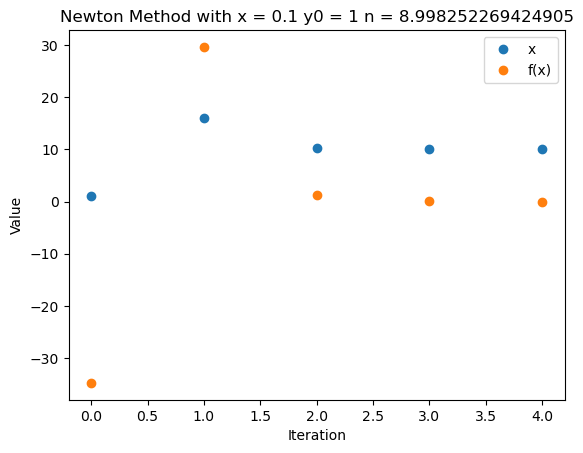

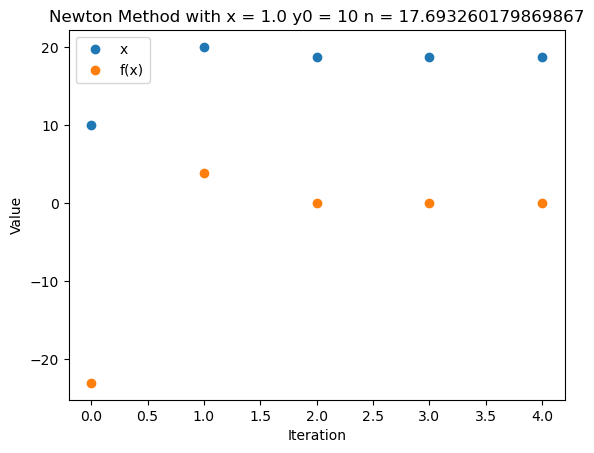

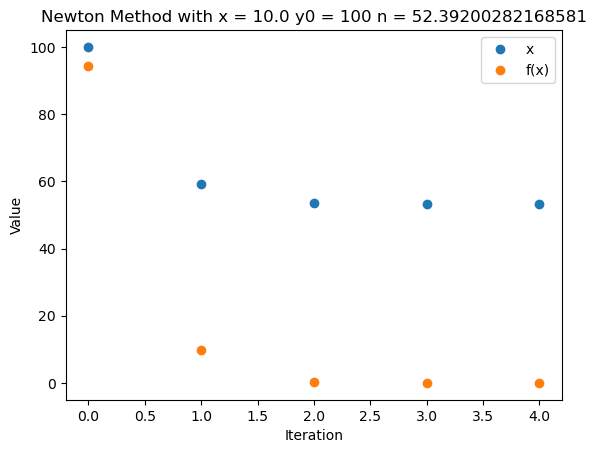

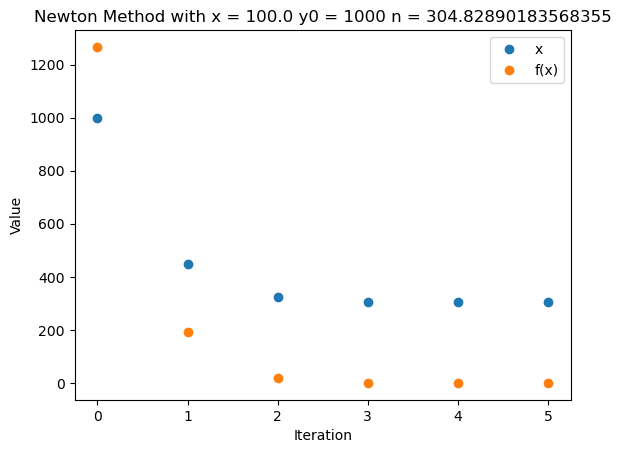

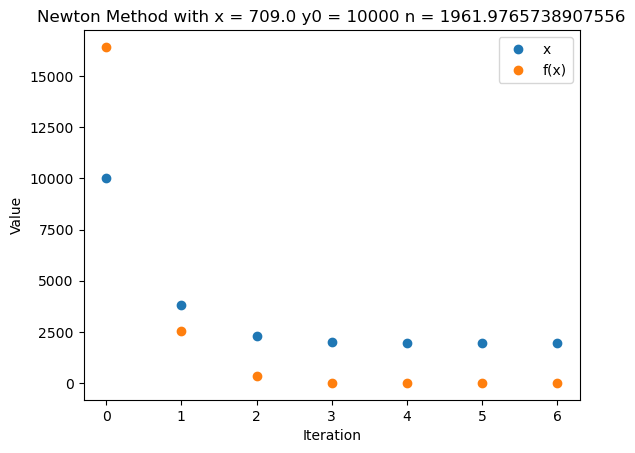

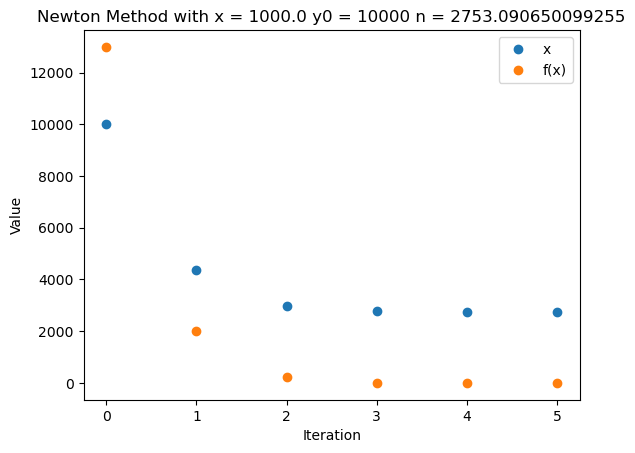

In [19]:
f = lambda y: numpy.log(numpy.finfo(float).eps) + y * (numpy.log(y) - 1 - numpy.log(numpy.abs(x)))
f_prime = lambda y: numpy.log(y) - numpy.log(numpy.abs(x))

x_list = [0.1, 1., 10., 100., 709., 1000.]
y0_list = [1, 10, 100, 1000, 10000, 10000]
n_list = [0, 0, 0, 0, 0, 0]

for i in range(len(x_list)):
    x = x_list[i]
    y0 = y0_list[i]
    result = newton(f, f_prime, y0)
    n = result[0] - 1
    n_list[i] = n
    
    fig = plt.figure()
    axes = fig.add_subplot(1, 1, 1)
    axes.plot(result[1], 'o', label='x')
    axes.plot(f(result[1]), 'o', label='f(x)')
    axes.set_title('Newton Method with x = ' + str(x) + ' y0 = ' + str(y0) + ' n = ' + str(n))
    axes.set_xlabel('Iteration')
    axes.set_ylabel('Value')
    axes.legend()
    plt.show()

In [20]:
print('Final n value from numerical approximation: ')
print(n_list)
print('Comparison with previous e * x approximation: ')
print(n_list > numpy.exp(1) * numpy.array(x_list))
print('Difference between n and e * x: ')
print(n_list - numpy.exp(1) * numpy.array(x_list))
print('Relative error: ')
print((n_list - numpy.exp(1) * numpy.array(x_list)) / numpy.exp(1) * numpy.array(x_list))

Final n value from numerical approximation: 
[8.998252269424905, 17.693260179869867, 52.39200282168581, 304.82890183568355, 1961.9765738907556, 2753.090650099255]
Comparison with previous e * x approximation: 
[ True  True  True  True  True  True]
Difference between n and e * x: 
[ 8.72642409 14.97497835 25.20918454 33.00071899 34.71475751 34.80882164]
Relative error: 
[3.21027202e-01 5.50898667e+00 9.27394072e+01 1.21402861e+03
 9.05452953e+03 1.28054499e+04]


By comparing with our previous approximation $n > e \times x$, we can see that our approximations are all greater than the previous approximation. Also, the difference between these two types of approximation is not large. 